## DAY 2 AGENDA:
  * **A brief overview of day 1**
  * **Effectively working with timeseries**
  * **Learning to plot**
  * **Putting everything together!**

**WELCOME TO DAY 2 OF THE INTRO TO DATA SCIENCE WORKSHOP!**

I hope you've learned a few things so far about the power of **Python** and **pandas** when leveraged on datasets that can't be properly handled using traditional tabular analysis tools.

Today, we are going to scale back the size of the data we are going to be working with a bit (Only 500K rows this time), but we are going to focus on a type of dataset that we haven't explicitly talked about just yet but that crops up in almost every analytical project, either in industry or in academia...

###Timeseries!!

While working with timeseries we are also going to use some of the really cool plotting functionality of **pandas** to make our analyses a lot more convincing to the more visual or the less analytically savvy people you're going to be showing/delivering your analyses to.

But before all of that, let's briefly go over what we've learned so far.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [2]:
priceData = pd.read_csv("./Crowd-Sourced_Price_Collection_CSV.csv",index_col=0)

In [3]:
priceData.shape

(506728, 234)

In [6]:
priceData = priceData.dropna(axis=1)

In [42]:
priceData.columns = priceData.columns.map(lambda x: x.replace(" ","_"))
priceData.head()

,Country,Location_Code,Location_Name,Outlet_Code,Outlet_Type,Obs_Date_(yyyy-MM-dd),Product_Code,Product_Name,Pref._Qty,Obs._Qty,Quantity,Obs._UoM_Code,Obs_Price,Conv._Price,Price_Type_Name,Rejected,Currency,Date
Line,,,,,,,,,,,,,,,,,,
1,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,11,"Rice, long grain",1,1,1 kg,1,1.322750,1.322750,Regular price,0,USD,2012-03-16
2,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1,1,1 kg,1,0.577200,0.577200,Regular price,0,USD,2012-03-16
3,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1,1,1 kg,1,0.577200,0.577200,Regular price,0,USD,2012-03-16
4,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,13,"Cornflakes, Kellogg's",500,500,500 g,2,4.930249,4.930249,Regular price,0,USD,2012-03-16
5,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,14,"Flour, wheat",1,1,1 kg,1,0.360750,0.360750,Regular price,0,USD,2012-03-16


In [8]:
priceData["Date"] = pd.to_datetime(priceData["Obs_Date_(yyyy-MM-dd)"],format="%Y-%m-%d",unit='D')

In [12]:
countryAvgPrices = priceData.groupby(["Country","Date"])["Conv._Price"].aggregate([np.mean,np.std])

In [58]:
avgPrices = priceData.groupby("Date")["Conv._Price"].mean()

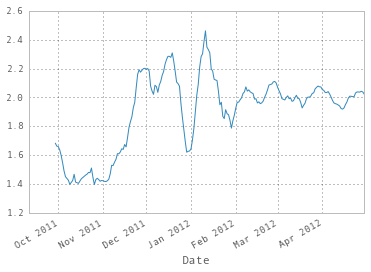

In [60]:
pd.rolling_mean(avgPrices,10).plot()

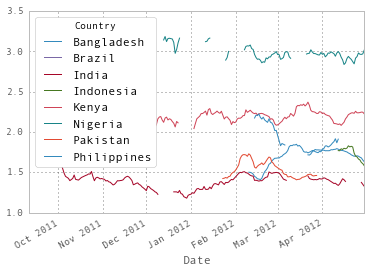

In [47]:
pd.rolling_mean(countryAvgPrices.unstack(level=0)["mean"],10).plot()

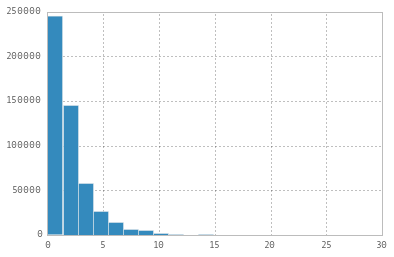

In [51]:
priceData["Conv._Price"].hist(bins=20)

In [55]:
priceData.Currency

array(['USD'], dtype=object)